In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('cardio_train.csv',delimiter=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dfcorr=df.corr()
dfcorr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022687687B48>,
      dtype=object)

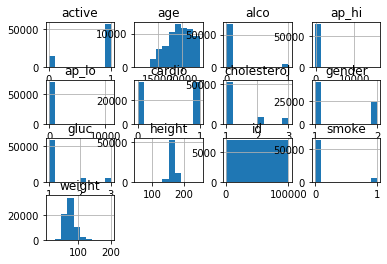

In [8]:
df.hist()

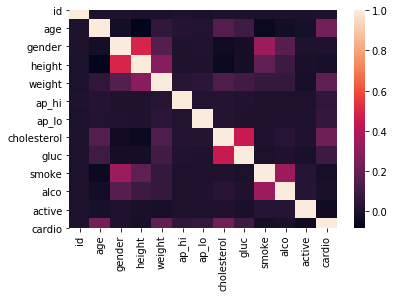

In [9]:
sns.heatmap(dfcorr)

In [10]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [11]:
df.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,False,False,False,False,False,False,False,False,False,False,False,False,False
69297,False,False,False,False,False,False,False,False,False,False,False,False,False
69298,False,False,False,False,False,False,False,False,False,False,False,False,False
69299,False,False,False,False,False,False,False,False,False,False,False,False,False


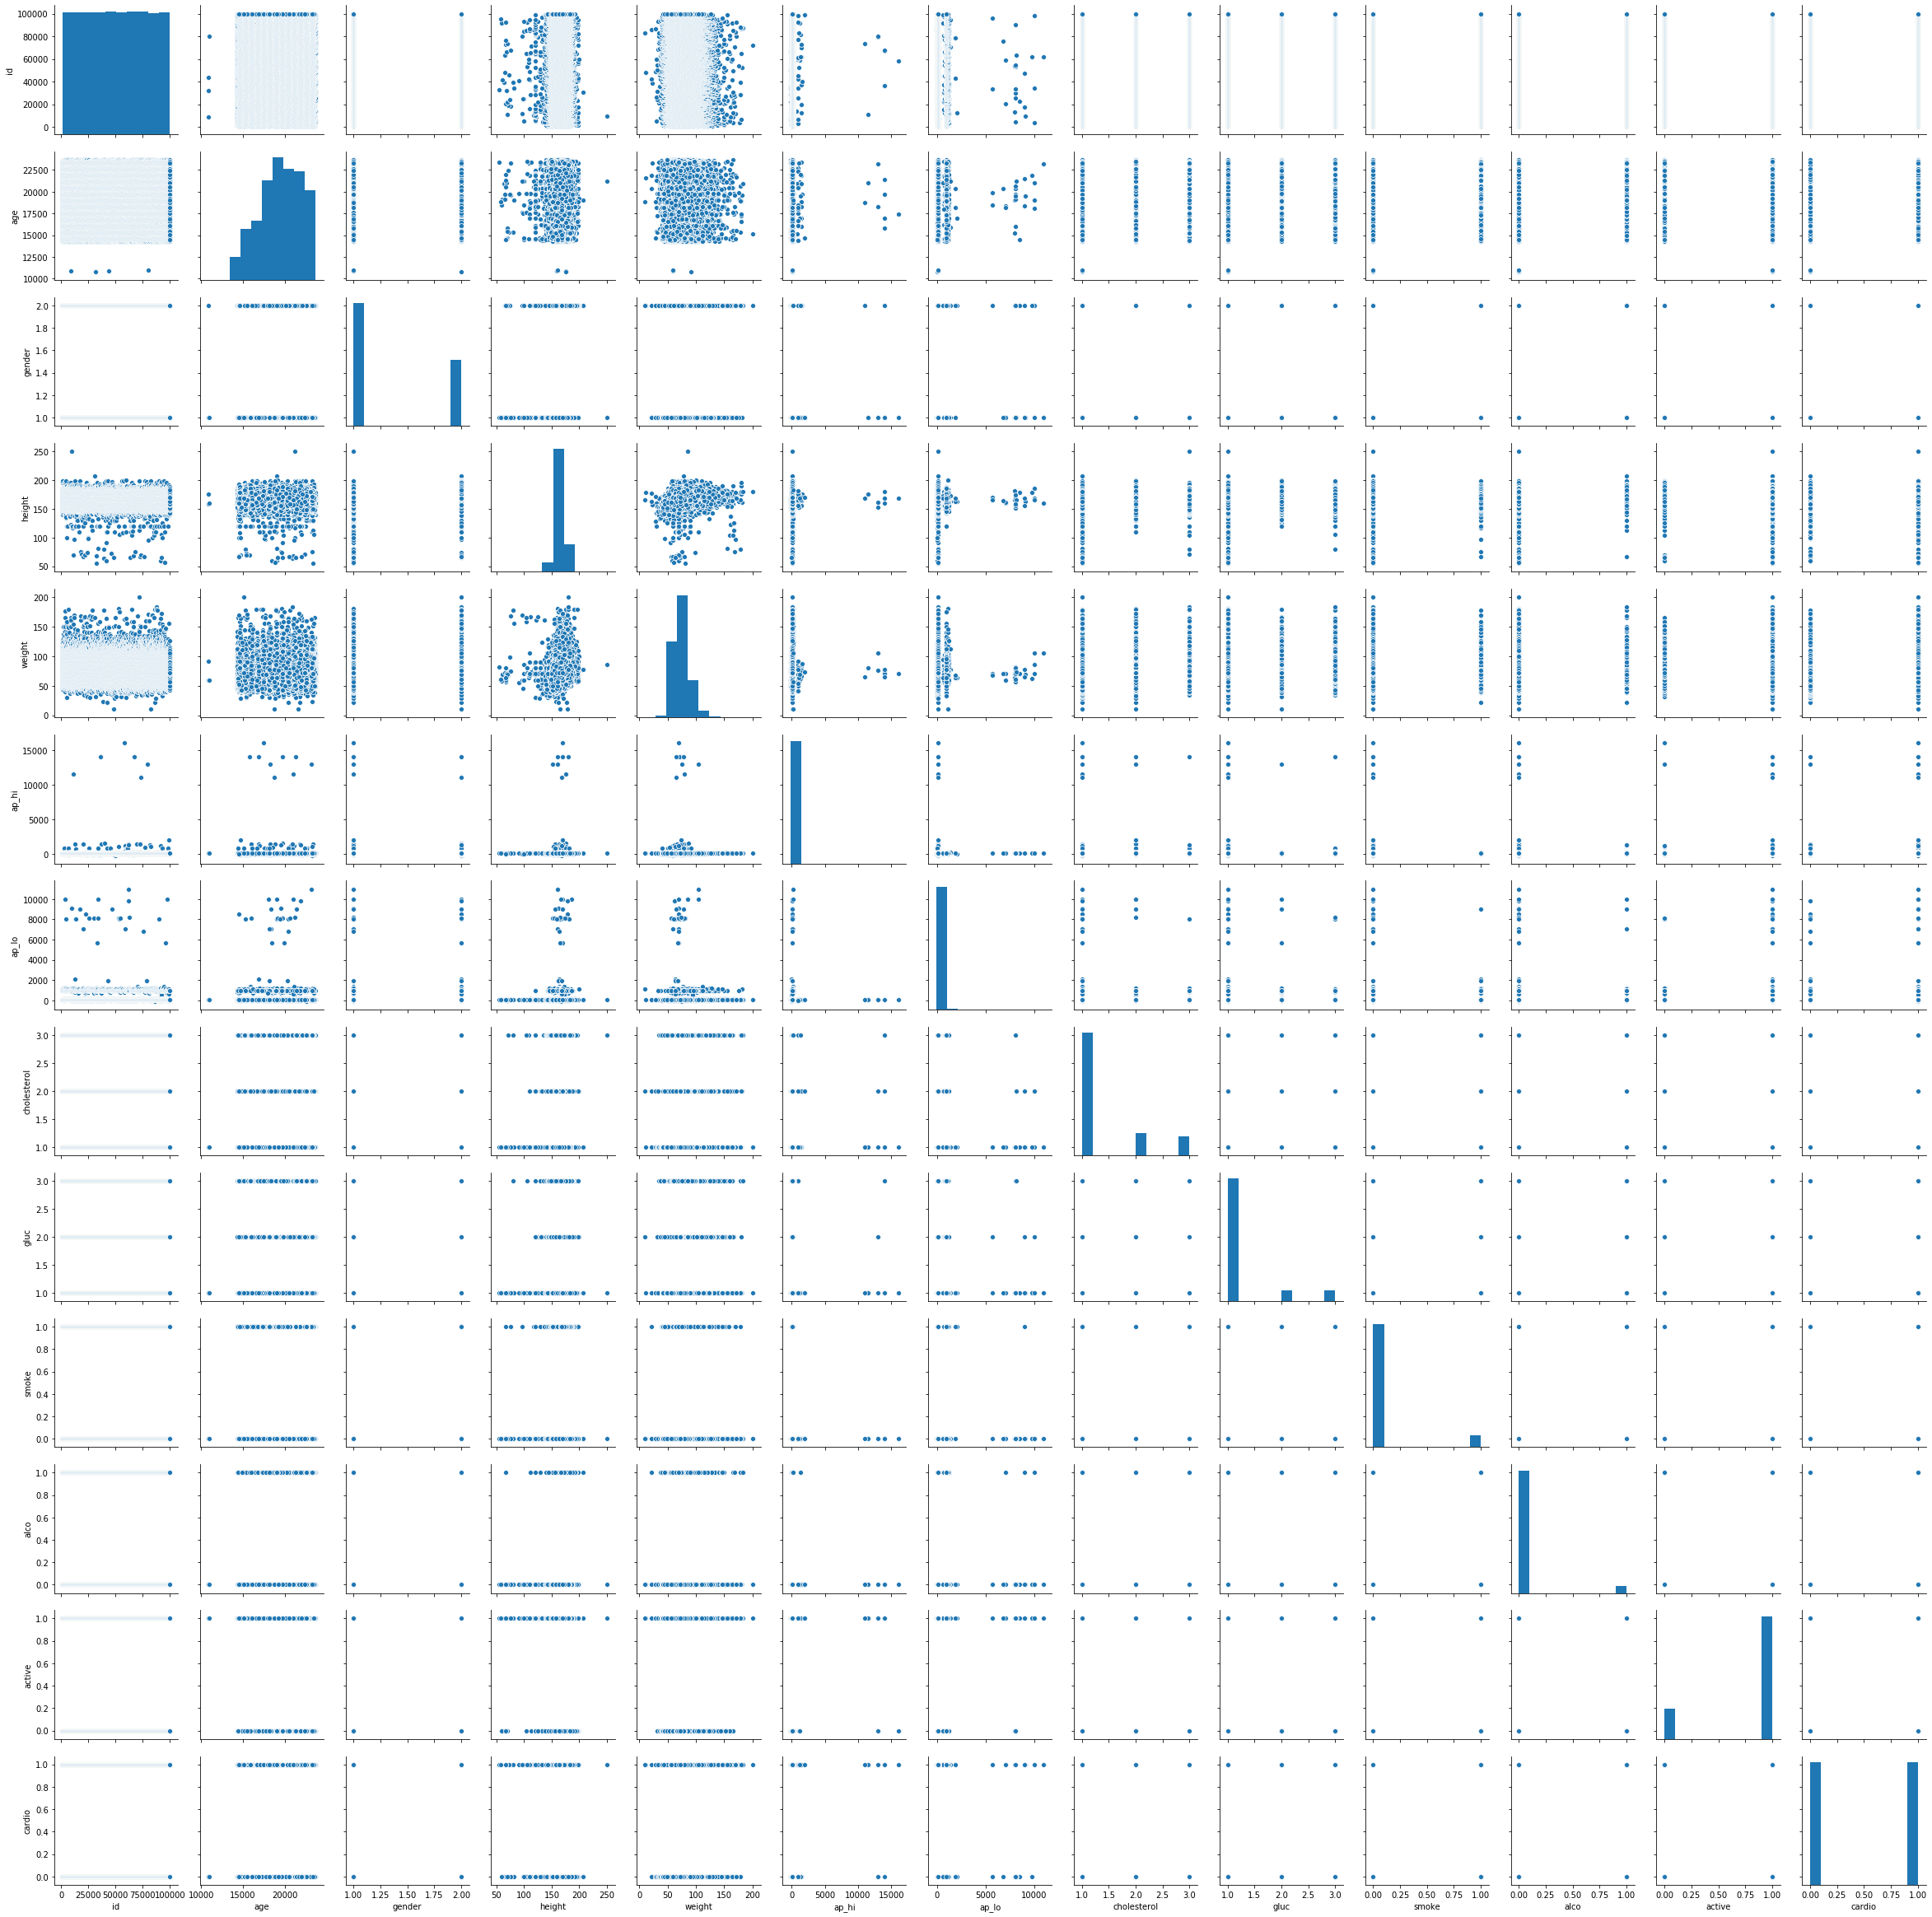

In [12]:
sns.pairplot(df)

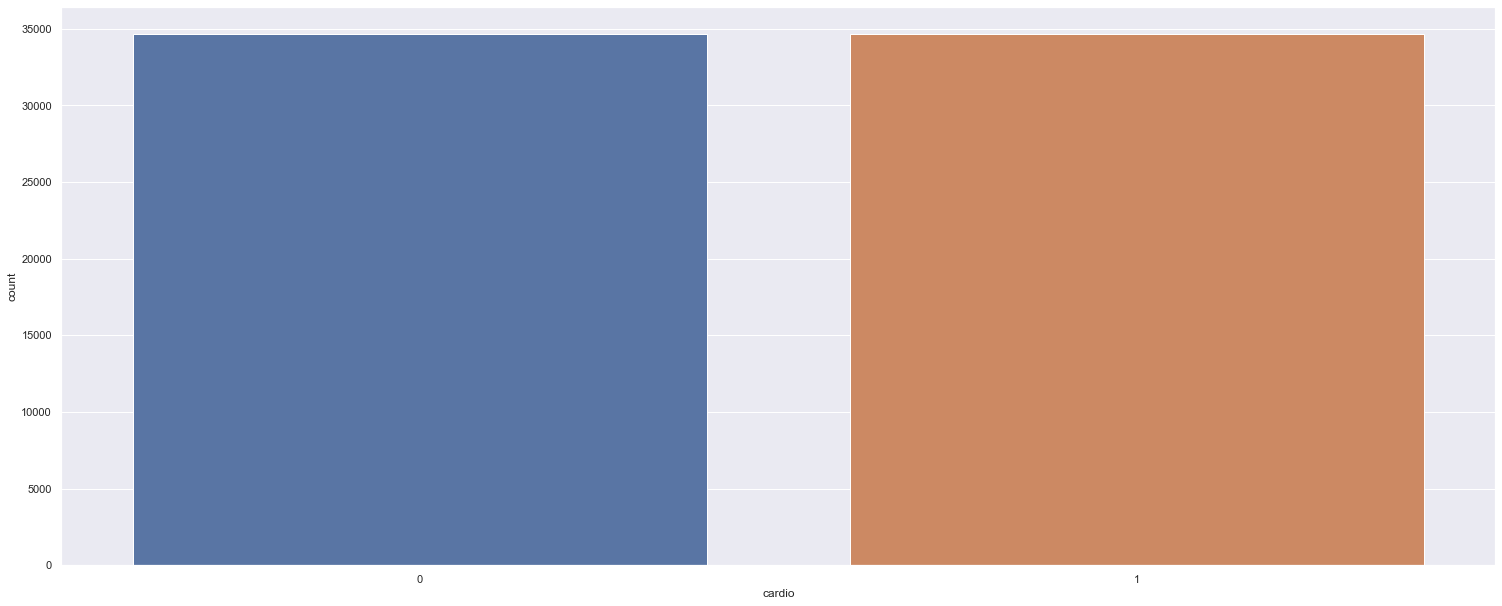

In [13]:
#Analysis of the various airlines 
sns.set(rc={'figure.figsize':(25.7,10.27)})
sns.countplot(df['cardio'])

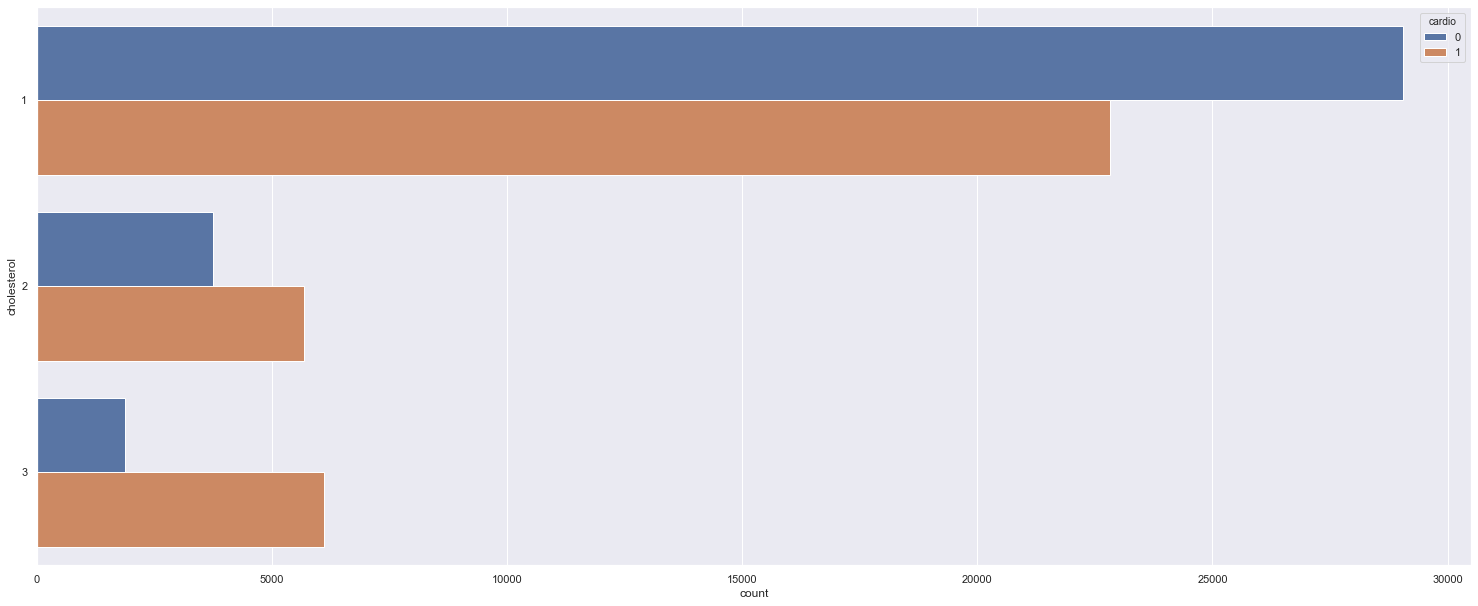

In [14]:
sns.countplot(y='cholesterol', hue='cardio', data=df)

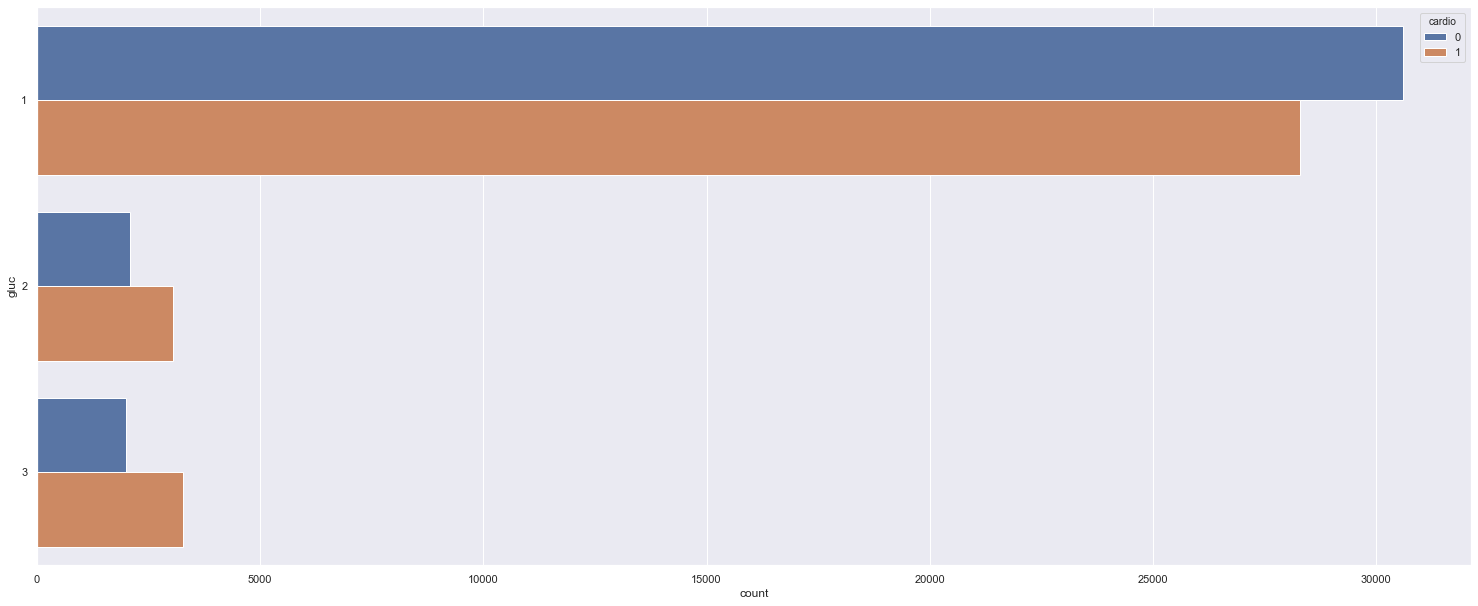

In [15]:
sns.countplot(y='gluc', hue='cardio', data=df)

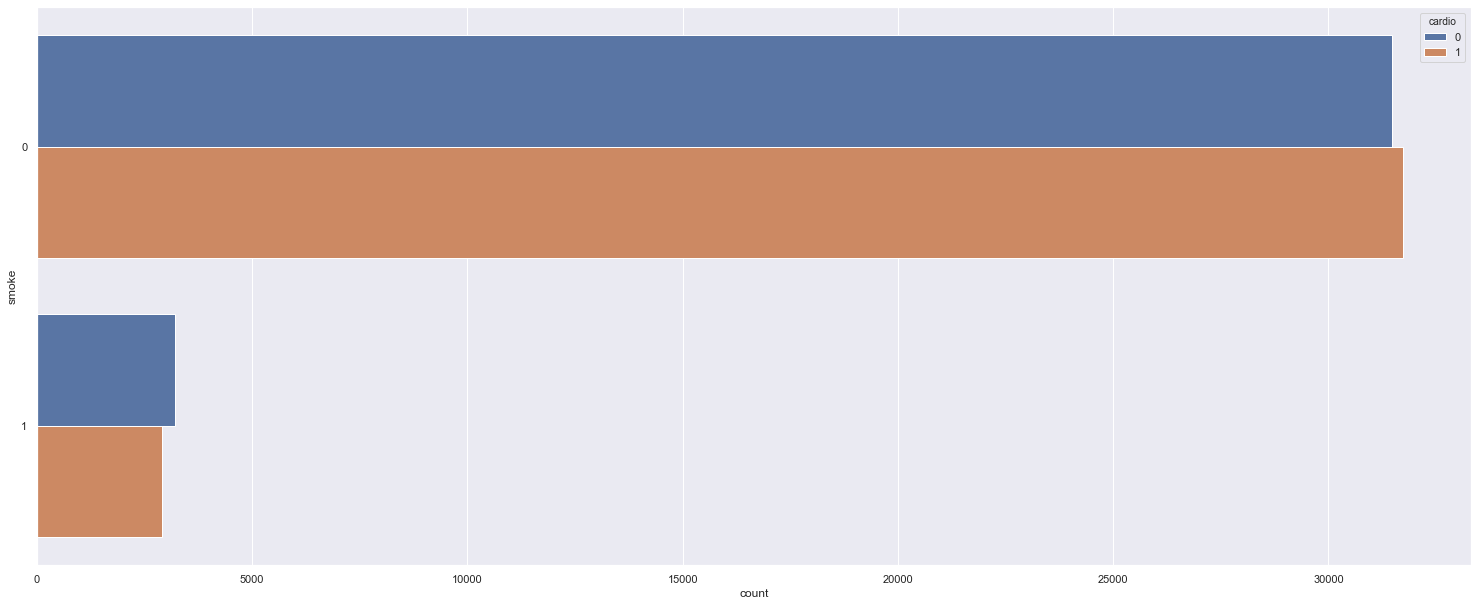

In [16]:
sns.countplot(y='smoke', hue='cardio', data=df)

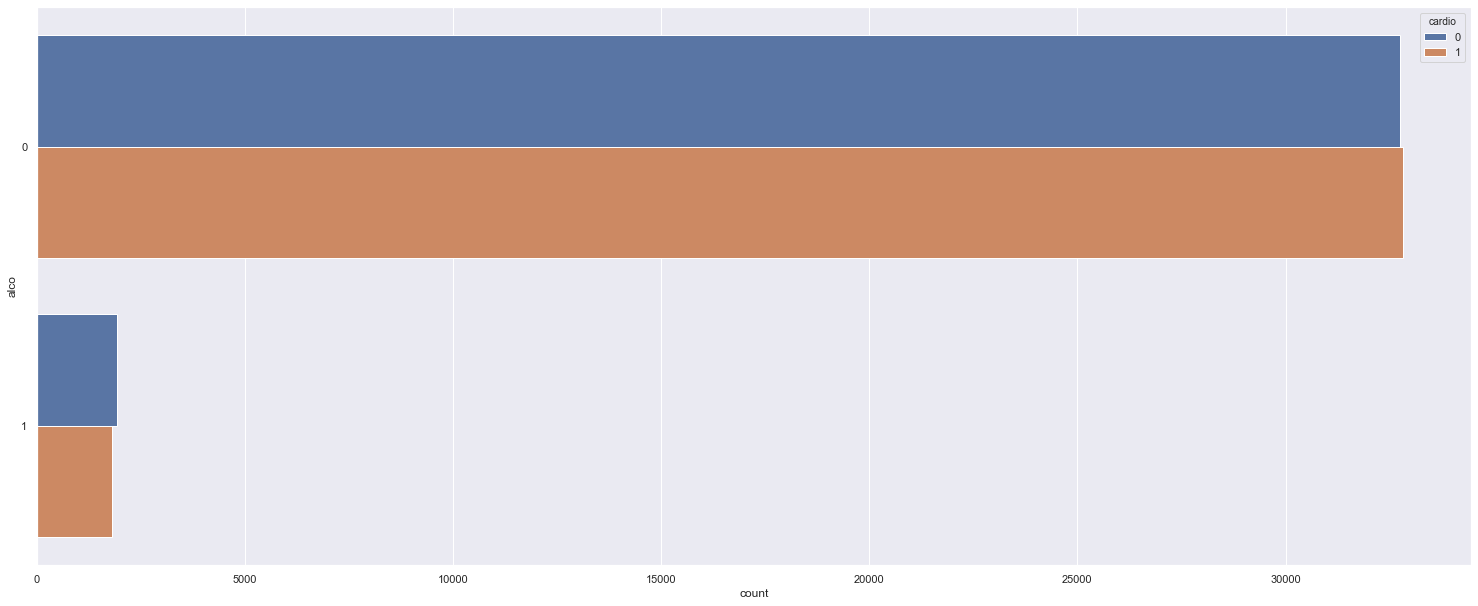

In [17]:
sns.countplot(y='alco', hue='cardio', data=df)

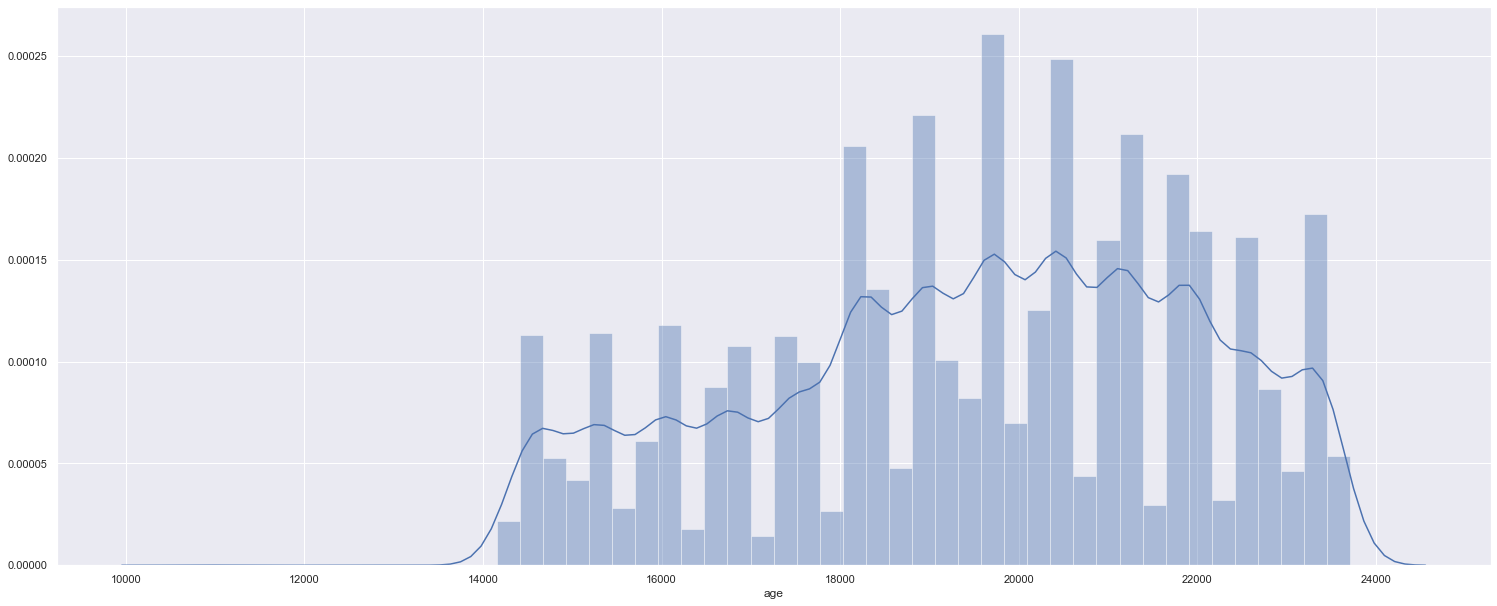

In [18]:
sns.distplot(df['age'])

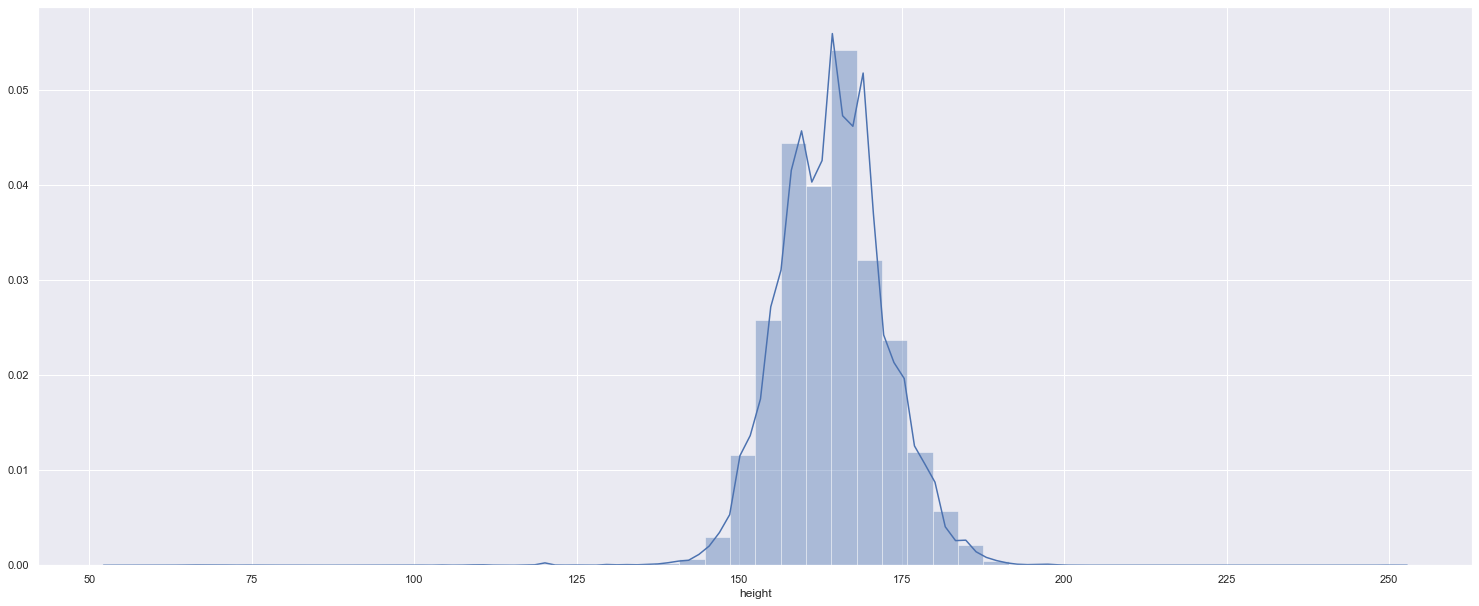

In [19]:
sns.distplot(df['height'])

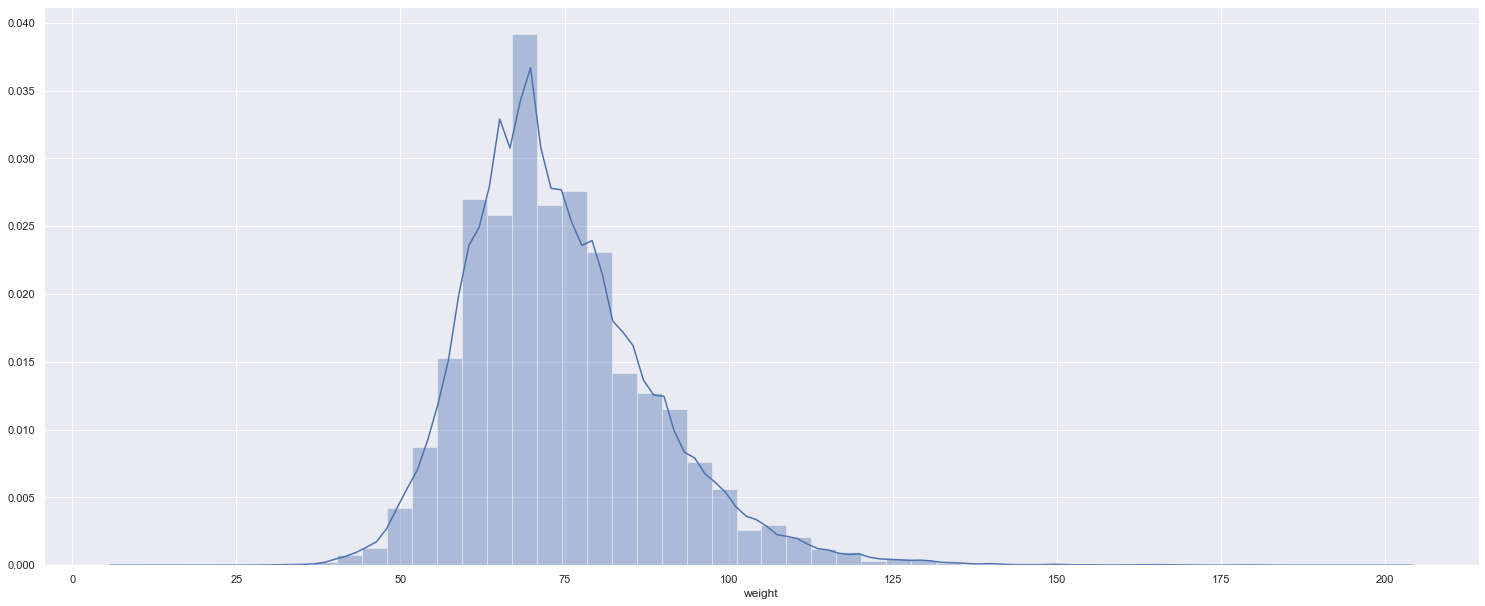

In [20]:
sns.distplot(df['weight'])

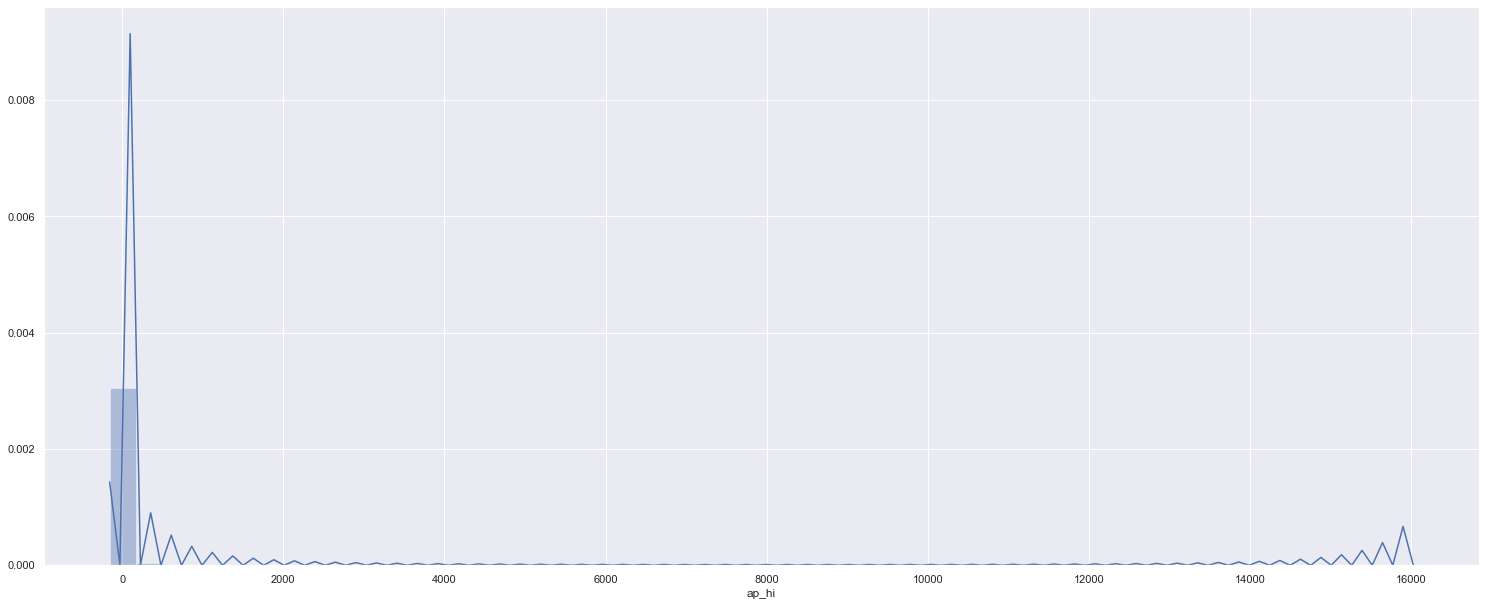

In [21]:
sns.distplot(df['ap_hi'])

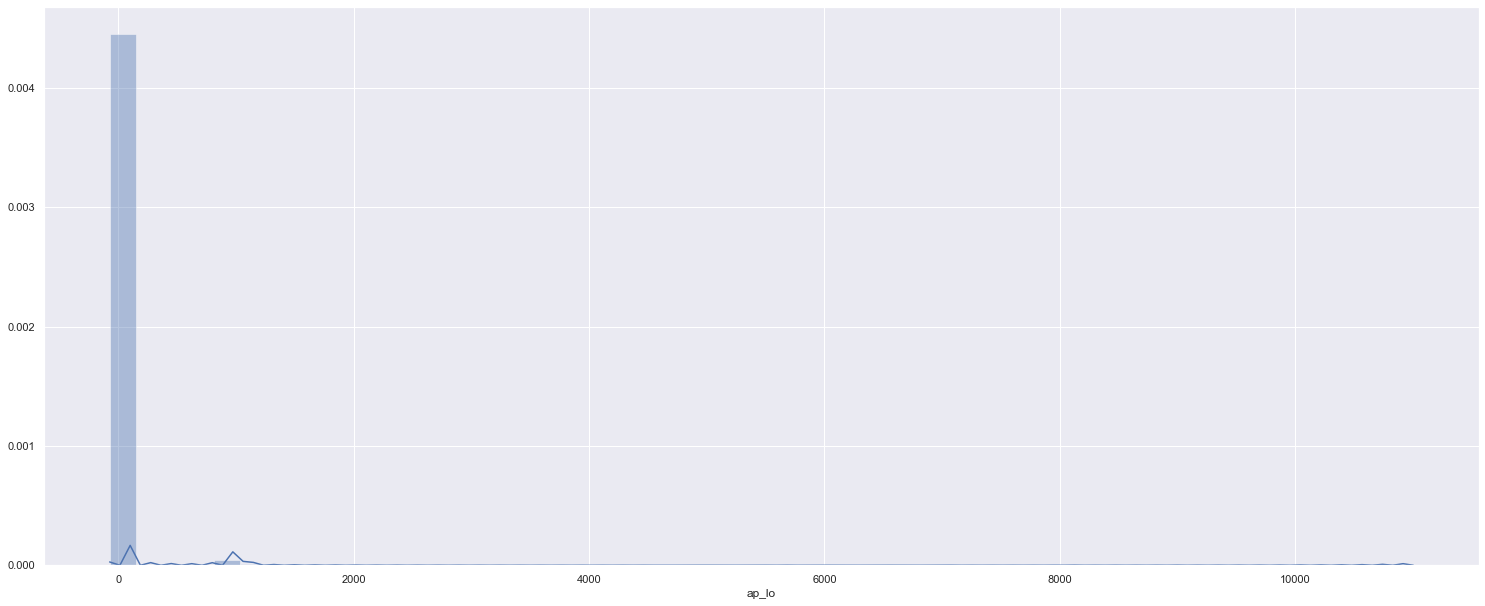

In [22]:
sns.distplot(df['ap_lo'])

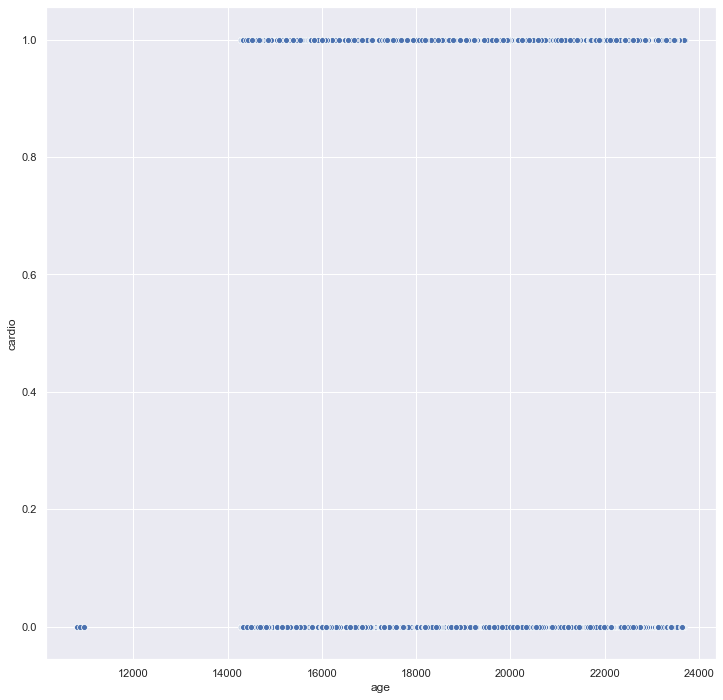

In [23]:
fig = plt.figure(figsize = (12,12))
sns.scatterplot(x = 'age', y = 'cardio', data = df)

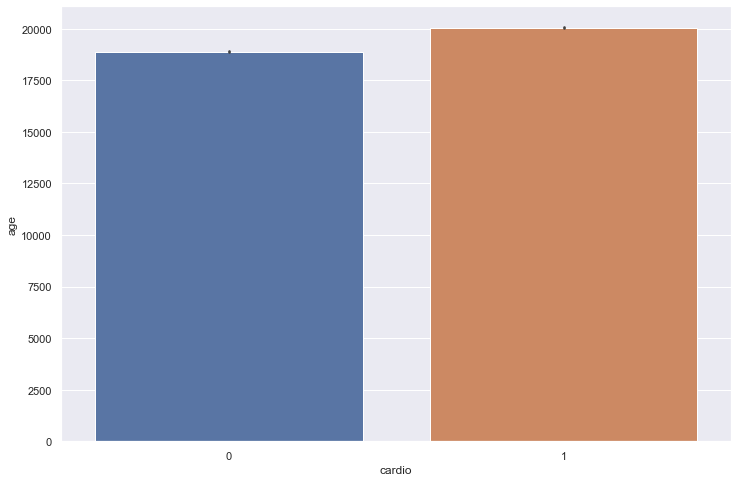

In [24]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'cardio', y = 'age', data = df)

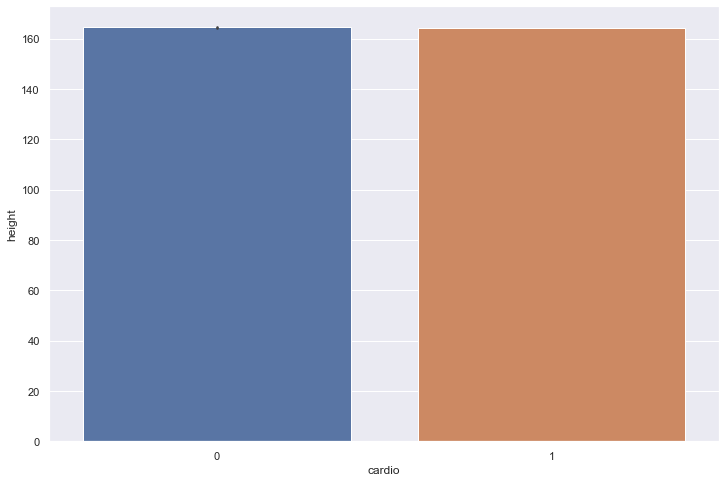

In [25]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'cardio', y = 'height', data = df)

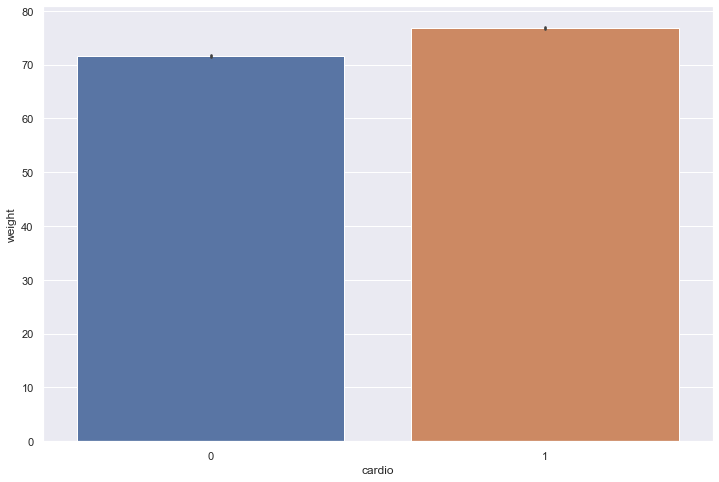

In [26]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'cardio', y = 'weight', data = df)

In [27]:
import numpy as np
df_x=df.drop(columns=["cardio"])
y=df['cardio']

In [28]:
#sacaling down using Minimaxscaler
from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler()
x=MS.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.000000,0.903678,0.0,0.512821,0.310526,0.017316,0.013550,0.5,0.5,0.0,0.0,1.0
1,0.000010,0.298103,0.0,0.553846,0.321053,0.016079,0.012647,0.0,0.0,0.0,0.0,1.0
2,0.000020,0.859698,0.0,0.564103,0.315789,0.016698,0.013550,0.0,0.0,0.0,0.0,1.0
3,0.000030,0.290437,1.0,0.564103,0.394737,0.016698,0.013550,0.0,0.0,1.0,1.0,1.0
4,0.000040,0.975223,0.0,0.512821,0.273684,0.016698,0.013550,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,0.999939,0.653659,1.0,0.579487,0.347368,0.016698,0.013550,0.0,0.0,1.0,0.0,1.0
69297,0.999960,0.913899,0.0,0.528205,0.610526,0.017934,0.014453,0.5,0.5,0.0,0.0,1.0
69298,0.999970,0.640186,1.0,0.656410,0.500000,0.020408,0.014453,1.0,0.0,0.0,1.0,0.0
69299,0.999990,0.900736,0.0,0.553846,0.326316,0.017625,0.013550,0.0,0.5,0.0,0.0,0.0


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss,accuracy_score,confusion_matrix,classification_report

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [32]:
model=[LogisticRegression(),SVC(),GaussianNB(),MultinomialNB(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

In [33]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('fscore of',m,'is')
    print('roc_auc_score',m,'is')
    print('Accuracy score of',m,'is')
    print(f1_score(y_test,predm))
    print(roc_auc_score(y_test,predm))
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

fscore of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is
roc_auc_score LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is
Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
              

In [34]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()
knnscores = cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.5965659  0.5923815  0.59025974 0.60036075 0.58186016]
0.5922856120166908 0.006266292342519662


In [35]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeClassifier()
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.46151071 0.61106702 0.64617605 0.64105339 0.56901652]
0.5857647393764426 0.06792073645844658


In [36]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier()
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.51013635 0.70882332 0.70620491 0.70670996 0.6644058 ]
0.6592560670437269 0.07638872439605329


In [37]:
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.63985282 0.65673472 0.64307359 0.65093795 0.64867595]
0.6478550084906616 0.005931689441482831


In [38]:
from sklearn.model_selection import cross_val_score
SM=SVC()
SMscores = cross_val_score(SM,x,y,cv=5)
print(SMscores)
print(SMscores.mean(),SMscores.std())

[0.63653416 0.65204531 0.64018759 0.6476912  0.64225413]
0.6437424772678689 0.005501665211726134


In [39]:
from sklearn.model_selection import cross_val_score
GB=GaussianNB()
GBscores = cross_val_score(GB,x,y,cv=5)
print(GBscores)
print(GBscores.mean(),GBscores.std())

[0.59425727 0.59418512 0.58737374 0.59177489 0.59528104]
0.5925744132561686 0.0028438884967906895


In [40]:
from sklearn.model_selection import cross_val_score
MNB=MultinomialNB()
MNBscores = cross_val_score(MNB,x,y,cv=5)
print(MNBscores)
print(MNBscores.mean(),MNBscores.std())

[0.58805281 0.5931751  0.58556999 0.59126984 0.59087957]
0.5897894610630188 0.002670667355225615


In [41]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(x_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)

best params: LogisticRegression(C=1.9909999999999997, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 1.9909999999999997}
best score: 0.7036113278669854


Text(0.5, 654.7072, 'Predicted label')

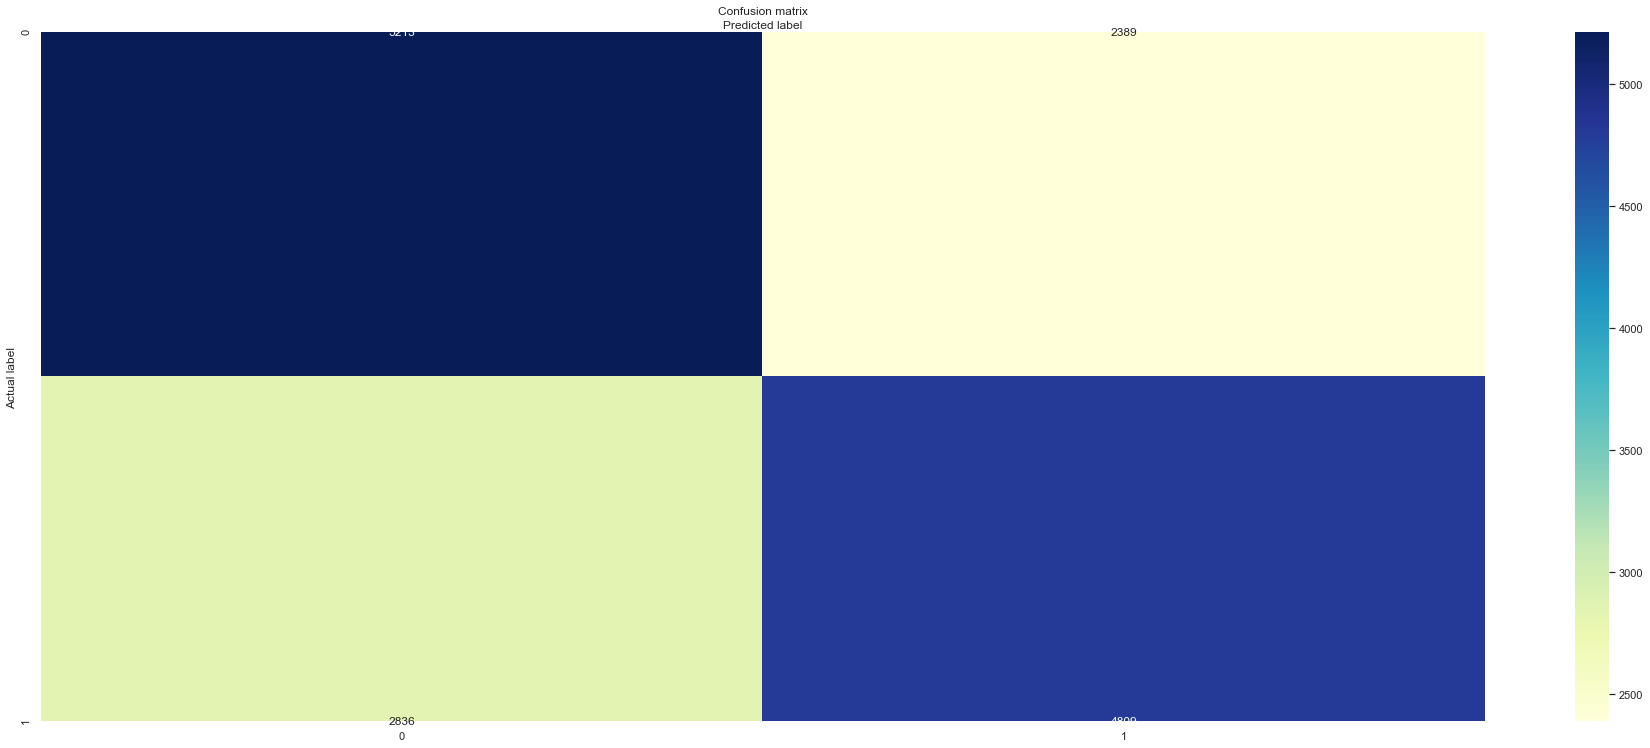

In [42]:
#Evaluation
## Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(x_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(x_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 65.73


In [44]:
log_opt.fit(x_train, y_train)
print(classification_report(y_test, log_opt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      7602
           1       0.67      0.63      0.65      7645

    accuracy                           0.66     15247
   macro avg       0.66      0.66      0.66     15247
weighted avg       0.66      0.66      0.66     15247



In [45]:
log_opt.fit(x_train, y_train) # fit optimised model to the training data
probality = log_opt.predict_proba(x_test) # predict probabilities
probality = probality[:, 1] # we will only keep probabilities associated with the fraud reported
logit_roc_auc = roc_auc_score(y_test, probality) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)
#slight increase in AUC scorelog_opt.fit(x_train, y_train) # fit optimised model to the training data

AUC score: 0.713


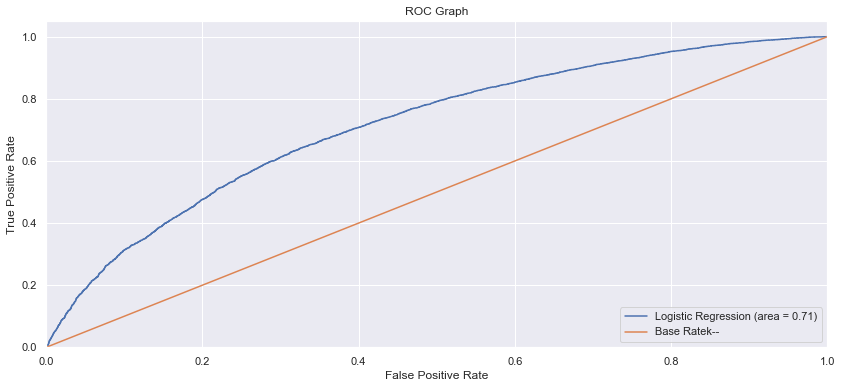

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(x_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#out of all classifiers logistic regresion and random forets classifier works best hence logistic regression model with auc score of 0.71 can be choosen